# Linear Regression
## Importing the relevant libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Load the data

In [2]:
data = pd.read_csv('1.03. Dummies.csv')

In [3]:
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


# Making a copy of data

In [5]:
data1 = data.copy()

# Converting Yes and No into 1 and 0

In [6]:
data1['Attendance'] = data1['Attendance'].map({'Yes':1,'No':0})

In [7]:
data1

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [8]:
data1.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


# Regression

## Indipendent and Dependent Variables

In [12]:
y = data1['GPA']
x1 = data1[['SAT','Attendance']]

# Adding a constant

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           2.19e-15
Time:                        19:15:15   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plot of Graph

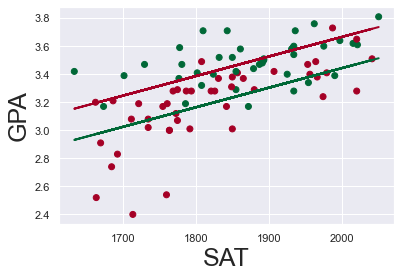

In [25]:
plt.scatter(data1['SAT'],y, c=data1['Attendance'],cmap='RdYlGn')
yhat_no = 0.6439 + 0.0014 * data1['SAT'] #didnot attend
yhat_yes = 0.6439 + 0.2226 + 0.0014 * data1['SAT'] #attended
fig = plt.plot(data1['SAT'],yhat_no, lw=2, c='#006837')#didnot attend
fig = plt.plot(data1['SAT'],yhat_yes, lw=2, c='#a50026')#attended
plt.xlabel('SAT', fontsize=25)
plt.ylabel('GPA', fontsize=25)
plt.show()

# Comparison to first data with no attendance

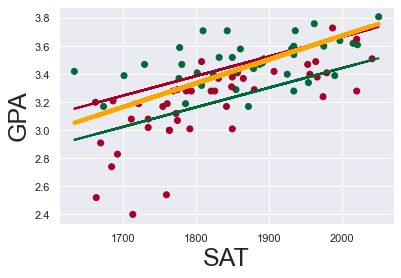

In [27]:
plt.scatter(data1['SAT'],y, c=data1['Attendance'],cmap='RdYlGn')
yhat_no = 0.6439 + 0.0014 * data1['SAT'] #didnot attend
yhat_yes = 0.6439 + 0.2226 + 0.0014 * data1['SAT'] #attended
yhat = 0.0017 * data1['SAT'] + 0.275
fig = plt.plot(data1['SAT'],yhat_no, lw=2, c='#006837',label='regression line1')#didnot attend
fig = plt.plot(data1['SAT'],yhat_yes, lw=2, c='#a50026', label='regression line2')#attended
fig = plt.plot(data1['SAT'],yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=25)
plt.ylabel('GPA', fontsize=25)
plt.show()

# Predictions

In [28]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [30]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1800], 'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1800,1


In [32]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.386137
dtype: float64

In [34]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
join = new_data.join(predictionsdf)
join

,const,SAT,Attendance,Predictions
0,1,1700,0,3.023513
1,1,1800,1,3.386137
